In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import cluster,metrics
import datetime
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import decomposition
from sklearn.metrics import adjusted_rand_score

In [2]:
def preprocessor(Data):
    scaler = StandardScaler()
    model = scaler.fit_transform(Data)
    scaled = pd.DataFrame(model, index = Data.index, columns = Data.columns)
    #all_components = len(X_scaled.columns)
    #X_scaled.head()
    return scaled

#  La stabilité des clusters :

In [3]:
customers_data = pd.read_csv('df_final.csv', encoding="ISO-8859-1")
customers_data.head()

,Unnamed: 0,customer_unique_id,Recency,Frequency,Monteray,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,...,geolocation_state,total_weight,total_volume,numbre_of_payment,installment_total,review_id,review_score,review_title,review_message,review_answer_timestamp
0,0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,e22acc9c116caa3f2b7121bbb380d08e,fadbb3709178fc513abc1b2670aa1ad2,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,...,SP,1500.0,7616.0,1.0,8.0,1.0,5.0,True,True,2018-05-21 13:44:48.000
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19,3594e05a005ac4d06a72673270ef9ec9,4cb282e167ae9234755102258dd52ee8,delivered,2018-05-07 11:11:27,2018-05-07 18:25:44,...,SP,375.0,5148.0,1.0,1.0,1.0,4.0,False,False,2018-05-11 22:29:25.000
2,2,0000f46a3911fa3c0805444483337064,585,1,86.22,b33ec3b699337181488304f362a6b734,9b3932a6253894a02c1df9d19004239f,delivered,2017-03-10 21:05:03,2017-03-10 21:05:03,...,SC,1500.0,43750.0,1.0,8.0,1.0,3.0,False,False,2017-04-07 01:19:44.000
3,3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62,41272756ecddd9a9ed0180413cc22fb6,914991f0c02ef0843c0e7010c819d642,delivered,2017-10-12 20:29:41,2017-10-12 20:49:17,...,PA,150.0,1045.0,1.0,4.0,1.0,4.0,False,True,2017-11-03 00:17:51.000
4,4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89,d957021f1127559cd947b62533f484f7,47227568b10f5f58a524a75507e6992c,delivered,2017-11-14 19:45:42,2017-11-14 20:06:52,...,SP,6050.0,528.0,1.0,6.0,1.0,5.0,False,False,2017-12-02 22:29:35.000


In [4]:
customers_data.drop(columns="Unnamed: 0",axis = 1,inplace =True)


In [5]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_unique_id             99441 non-null  object 
 1   Recency                        99441 non-null  int64  
 2   Frequency                      99441 non-null  int64  
 3   Monteray                       99441 non-null  float64
 4   order_id                       99441 non-null  object 
 5   customer_id                    99441 non-null  object 
 6   order_status                   99441 non-null  object 
 7   order_purchase_timestamp       99441 non-null  object 
 8   order_approved_at              99281 non-null  object 
 9   order_delivered_carrier_date   97658 non-null  object 
 10  order_delivered_customer_date  96476 non-null  object 
 11  order_estimated_delivery_date  99441 non-null  object 
 12  customer_zip_code_prefix       99441 non-null 

### Sélection de features pour notre analyse:

In [6]:
customer_df = customers_data[['Recency','Frequency','Monteray','review_score','order_purchase_timestamp']]
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Recency                   99441 non-null  int64  
 1   Frequency                 99441 non-null  int64  
 2   Monteray                  99441 non-null  float64
 3   review_score              99441 non-null  float64
 4   order_purchase_timestamp  99441 non-null  object 
dtypes: float64(2), int64(2), object(1)
memory usage: 3.8+ MB


In [7]:
customer_df['order_purchase_timestamp'] = pd.to_datetime(customer_df['order_purchase_timestamp'])

C:\Users\Lynda\AppData\Local\Temp\ipykernel_17988\2919941358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['order_purchase_timestamp'] = pd.to_datetime(customer_df['order_purchase_timestamp'])


In [8]:
print("La premiere date d'achât:\t\t", customer_df['order_purchase_timestamp'].min())
print("La derniere date d'achât:\t\t", customer_df['order_purchase_timestamp'].max())

La premiere date d'achât:		 2016-09-04 21:15:19
La derniere date d'achât:		 2018-10-17 17:30:18


#### Visualisation de order_purchase_timestamp:

<AxesSubplot:xlabel='order_purchase_timestamp', ylabel='Count'>

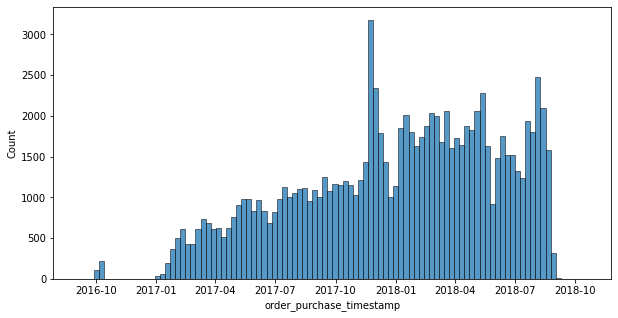

In [9]:
plt.subplots(figsize=(10,5))
sns.histplot(customer_df, x = 'order_purchase_timestamp',bins = 100)

#### Je crée un modèle de clustering sur les commandes les plus enciennes (04/09/2016 à 31/08/2017)

In [10]:
start_date = datetime.datetime(2016,9,4)
end_date = datetime.datetime(2017,8,31)

In [11]:
select = (customer_df['order_purchase_timestamp'] >= start_date) & (customer_df['order_purchase_timestamp'] <= end_date)
df = customer_df[select]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23148 entries, 2 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Recency                   23148 non-null  int64         
 1   Frequency                 23148 non-null  int64         
 2   Monteray                  23148 non-null  float64       
 3   review_score              23148 non-null  float64       
 4   order_purchase_timestamp  23148 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 1.1 MB


In [12]:
# pour notre selection (11/2017 à 08/2018) on a:
print("Premier Date d'Achât:\t\t", df['order_purchase_timestamp'].min())
print("Dernier Date d'Achât:\t\t", df['order_purchase_timestamp'].max())

Premier Date d'Achât:		 2016-09-04 21:15:19
Dernier Date d'Achât:		 2017-08-30 23:51:01


* Je selectionne les colonnes pertinents pour notre analyse:

In [13]:
my_df = df[['Recency','Frequency','Monteray','review_score']]
my_df.shape

(23148, 4)

#### Créer un modèle de kmeans sur les commande plus ancienne (les date choisie):



In [14]:
model = preprocessor(my_df)
model_kmeans = cluster.KMeans(n_clusters = 4)
model_kmeans.fit(model)

KMeans(n_clusters=4)

* faire la visualisation en 2D avec  ACP:

[0.34665387 0.60611519]


Text(0.5, 1.0, '4 clusters')

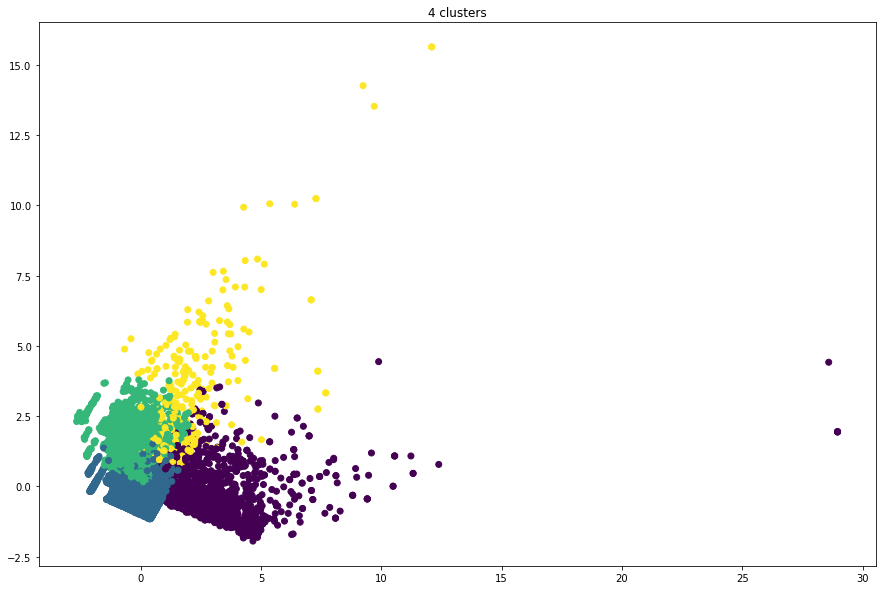

In [15]:
pca=decomposition.PCA(n_components=2)
pca.fit(model)
print(pca.explained_variance_ratio_.cumsum())
X_model_trans=pca.transform(model)
fig=plt.figure(figsize=(15,10))

cls_model=cluster.KMeans(n_clusters=4)
cls_model.fit(model)
ax=fig.add_subplot(111)
ax.scatter(X_model_trans[:,0],X_model_trans[:,1],c=cls_model.labels_)
ax.set_title("4 clusters")

##### Maintenant que notre modèle de clustering KMeans est créé à partir des 12 premiers mois, nous allons prédire le clustering chaque mois suivant et créer un nouveau modèle chaque mois, (le suivant et le précidents) pour pouvoir comparer les deux avec notre score ARI

In [16]:
# data de réference
start_date = (2017,8,31)
end_date =  (2018,10,17) 

In [17]:

table_test=customer_df[customer_df["order_purchase_timestamp"]>"2017-08-31 23:59:59"]
table_test.shape

(76144, 5)

In [18]:
table_test["annee_mois"]=table_test["order_purchase_timestamp"].dt.strftime('%Y%m')
table_test.head()

C:\Users\Lynda\AppData\Local\Temp\ipykernel_17988\2581036256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_test["annee_mois"]=table_test["order_purchase_timestamp"].dt.strftime('%Y%m')


,Recency,Frequency,Monteray,review_score,order_purchase_timestamp,annee_mois
0,160,1,141.90,5.0,2018-05-10 10:56:27,201805
1,163,1,27.19,4.0,2018-05-07 11:11:27,201805
3,369,1,43.62,4.0,2017-10-12 20:29:41,201710
4,336,1,196.89,5.0,2017-11-14 19:45:42,201711
5,194,1,166.98,4.0,2018-04-05 19:33:16,201804


In [19]:
table_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76144 entries, 0 to 99439
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Recency                   76144 non-null  int64         
 1   Frequency                 76144 non-null  int64         
 2   Monteray                  76144 non-null  float64       
 3   review_score              76144 non-null  float64       
 4   order_purchase_timestamp  76144 non-null  datetime64[ns]
 5   annee_mois                76144 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 4.1+ MB


#### Etude de la stabilité(comparaison et prediction):

In [20]:
annee_mois=["201709","201710","201711","201712",
  
       "201801","201802","201803","201804","201805","201806","201807","201808","201809","201810"]
score_ARI=[]

for i in annee_mois:

    model=table_test.loc[(table_test["annee_mois"] <= i)]

    df= model[["Recency","Frequency","Monteray","review_score"]]

    if df.shape != (0,4):
        df_norm= preprocessor(df)
        cls_test=cluster.KMeans(n_clusters=4)
        cls_test.fit(df_norm)

        score=adjusted_rand_score(cls_test.labels_,cls_model.predict(df_norm))


        score_ARI.append(score)
print(score_ARI)

[0.8073891889283631, 0.8723754492952837, 0.8766212318182613, 0.8970385705254847, 0.4347961620035352, 0.4081641900788432, 0.40651859772211457, 0.40363674624755963, 0.40008003307224177, 0.403089934798236, 0.4037005642617638, 0.3988318958872733, 0.39900778762888967, 0.3989841175508125]


In [112]:
# annee_mois=["201709","201710","201711","201712",
#        "201801","201802","201803","201804","201805","201806","201807","201808","201809","201810"]
# score_ARI=[]

# for i in annee_mois:

#     model=table_test.loc[(table_test["annee_mois"] <= i)]
#     print(model.shape)

(4285, 6)
(8916, 6)
(16460, 6)
(22133, 6)
(29402, 6)
(36130, 6)
(43341, 6)
(50280, 6)
(57153, 6)
(63320, 6)
(69612, 6)
(76124, 6)
(76140, 6)
(76144, 6)


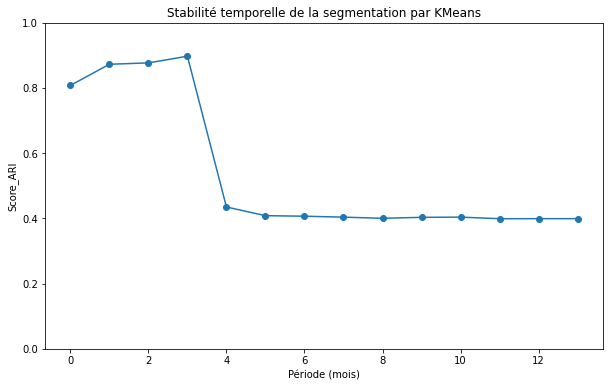

In [21]:
plt.figure(figsize=(10,6))
plt.plot(score_ARI, marker = 'o')
plt.title('Stabilité temporelle de la segmentation par KMeans')
plt.xlabel('Période (mois)')
plt.ylabel('Score_ARI')
plt.ylim((0,1))
plt.show()    

#### le score ARI passe à 0,89. On peut donc considérer que notre modèle de clustering est fiable pendant 3 mois , mais a partir de 3  mois  il faut changer le modèle.
